<a href="https://colab.research.google.com/github/jinwu-5/UnderstandingDeepLearning/blob/main/Notebooks/Chap13/13_3_Neighborhood_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 13.3: Neighborhood sampling**

This notebook investigates neighborhood sampling of graphs as in figure 13.10 from the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Let's construct the graph from figure 13.10, which has 23 nodes.

In [22]:
# Define adjacency matrix
A = np.array([[0,1,1,1,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,0, 0,0,0,1,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [1,0,1,0,1, 0,1,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 1,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,1, 0,0,1,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,0, 0,0,1,0,1, 1,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,1,1, 1,1,0,0,0, 1,0,0,1,0, 0,0,0,0,0, 0,0,0],
              [0,1,0,0,0, 0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0,0],
              [0,1,1,0,0, 0,1,0,1,0, 0,1,1,0,0, 0,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,1,1,0,0, 0,0,1,0,0, 0,0,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,0,0,0,1, 1,1,0,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 1,0,0,1,0, 0,1,1,0,0, 0,0,0],
              [0,0,0,0,0, 0,0,1,0,0, 0,0,1,0,0, 0,0,1,1,0, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,1,0,0,1, 0,1,0,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,1, 0,1,1,0,0, 1,0,1,0,1, 0,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0,1,0, 1,1,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,0, 0,0,1,0,0, 0,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,1, 1,1,0,0,0, 1,0,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,1, 0,1,0],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,0,0, 1,0,1],
              [0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,1,1,0, 0,1,0]]);
print(A)

[[0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 

In [23]:
# Routine to draw graph structure, highlighting original node (brown in fig 13.10)
# and neighborhood nodes (orange in figure 13.10)
def draw_graph_structure(adjacency_matrix, original_node, neighborhood_nodes=None):

  G = nx.Graph()
  n_node = adjacency_matrix.shape[0]
  for i in range(n_node):
    for j in range(i):
      if adjacency_matrix[i,j]:
          G.add_edge(i,j)

  color_map = []

  for node in G:
    if original_node[node]:
      color_map.append('brown')
    else:
      if neighborhood_nodes[node]:
        color_map.append('orange')
      else:
        color_map.append('white')

  nx.draw(G, nx.spring_layout(G, seed = 7), with_labels=True,node_color=color_map)
  plt.show()

Output layer:


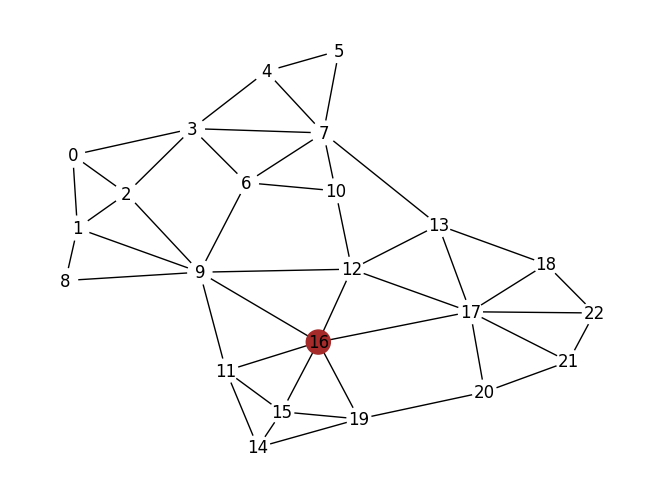

In [24]:
n_nodes = A.shape[0]

# Define a single output layer node
output_layer_nodes=np.zeros((n_nodes,1)); output_layer_nodes[16]=1
# Define the neighboring nodes to draw (none)
neighbor_nodes = np.zeros((n_nodes,1))
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

Let's imagine that we want to form a batch for a node labelling task that consists of just node 16 in the output layer (highlighted).   The network consists of the input, hidden layer 1, hidden layer2, and the output layer.

Hidden layer 2:


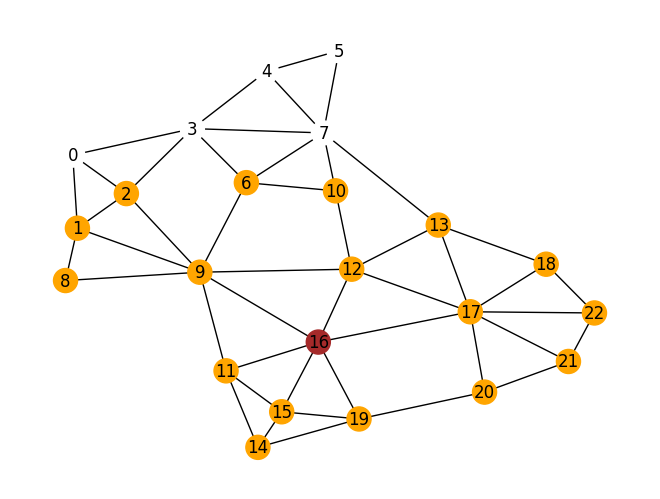

In [25]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
A2 = np.linalg.matrix_power(A, 2)            # counts length-2 walks
hidden_layer2_nodes = (A2[:, 16] > 0).astype(int).reshape((n_nodes, 1))
hidden_layer2_nodes[16, 0] = 0               # don't include the output node itself

print("Hidden layer 2:")
draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)

Hidden layer 1:


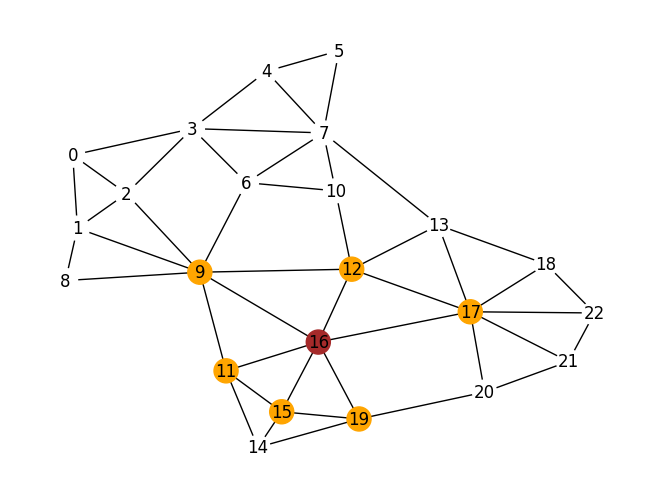

In [26]:
# TODO - Find the nodes in hidden layer 1 that connect that connect to node 16 in the output layer
# using the adjacency matrix
# Replace this line:
# 1-hop neighbors of node 16 are the nonzeros in column 16 of A
hidden_layer1_nodes = (A[:, 16] > 0).astype(int).reshape((n_nodes, 1))
hidden_layer1_nodes[16, 0] = 0  # don't include the output node itself

print("Hidden layer 1:")
draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)

Input layer:


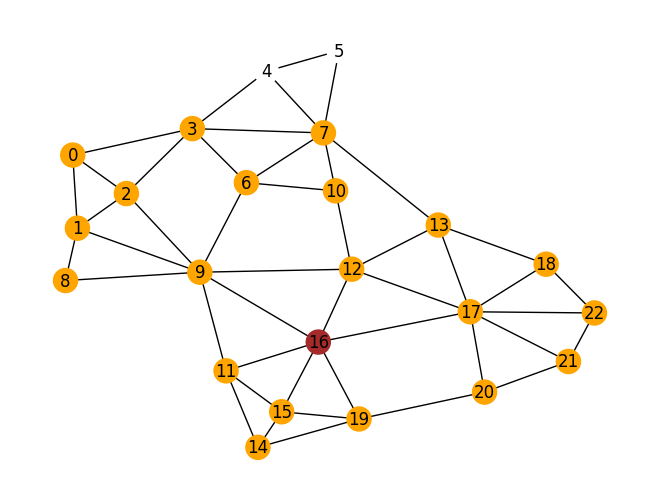

In [27]:
# TODO Find the nodes in the input layer that connect to node 16 in the output layer
# using the adjacency matrix

# nodes at distance 3 from node 16
A3 = np.linalg.matrix_power(A, 3)
input_layer_nodes = (A3[:, 16] > 0).astype(int).reshape((n_nodes, 1))
input_layer_nodes[16, 0] = 0  # exclude the output node itself

print("Input layer:")
draw_graph_structure(A, output_layer_nodes, input_layer_nodes)


This is bad news.  This is a fairly sparsely connected graph (i.e. adjacency matrix is mostly zeros) and there are only two hidden layers.  Nonetheless, we have to involve almost all the nodes in the graph to compute the loss at this output.

To resolve this problem, we'll use neighborhood sampling.  We'll start again with a single node in the output layer.

Output layer:


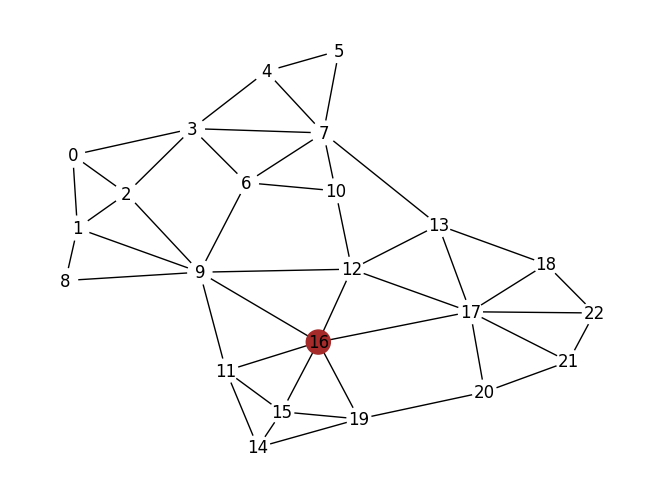

In [28]:
print("Output layer:")
draw_graph_structure(A, output_layer_nodes, neighbor_nodes)

In [29]:
# Define umber of neighbors to sample
n_sample = 3

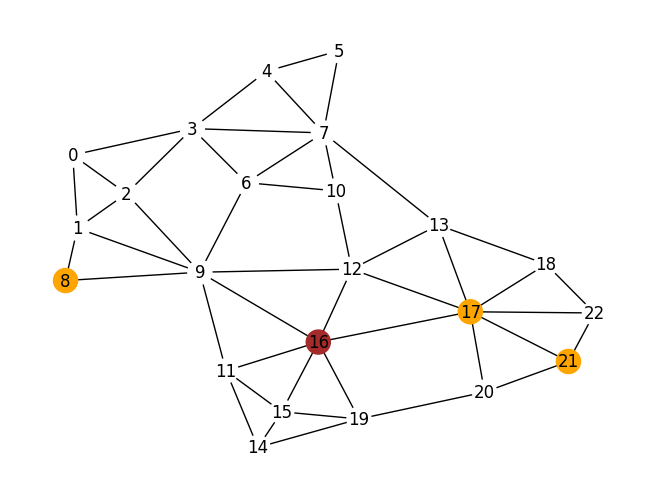

In [30]:
# TODO Find the nodes in hidden layer 2 that connect to node 16 in the output layer
# using the adjacency matrix. Then sample n_sample of these nodes randomly without replacement.

if 'n_sample' not in globals():
    n_sample = 5  # fallback if not already defined

A2 = np.linalg.matrix_power(A, 2)
hl2_all = np.where(A2[:, 16] > 0)[0]          # all 2-hop neighbors of node 16
hl2_all = hl2_all[hl2_all != 16]              # exclude the output node

k = min(n_sample, hl2_all.size)
hl2_idx = np.random.choice(hl2_all, size=k, replace=False) if k > 0 else np.array([], dtype=int)

hidden_layer2_nodes = np.zeros((n_nodes, 1), dtype=int)
hidden_layer2_nodes[hl2_idx, 0] = 1

draw_graph_structure(A, output_layer_nodes, hidden_layer2_nodes)


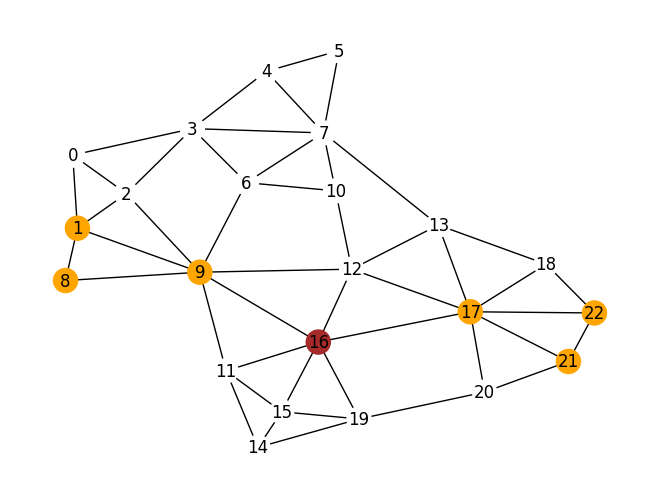

In [31]:
# TODO Find the nodes in hidden layer 1 that connect to the nodes in hidden layer 2
# using the adjacency matrix. Then sample n_sample of these nodes randomly without
# replacement. Make sure not to sample nodes already included in hidden layer 2 or the output layer.
# The nodes at hidden layer 1 are the union of these nodes and the nodes in hidden layer 2.

if hl2_idx.size > 0:
    # any node adjacent to any HL2 node
    hl1_cand = np.where((A[:, hl2_idx].sum(axis=1) > 0))[0]
else:
    hl1_cand = np.array([], dtype=int)

# exclude: output node + HL2 nodes
exclude = set([16]) | set(hl2_idx.tolist())
hl1_cand = np.array([i for i in hl1_cand if i not in exclude], dtype=int)

k = min(n_sample, hl1_cand.size)
hl1_sample = np.random.choice(hl1_cand, size=k, replace=False) if k > 0 else np.array([], dtype=int)

# union with HL2
hl1_union_idx = np.union1d(hl1_sample, hl2_idx)

hidden_layer1_nodes = np.zeros((n_nodes, 1), dtype=int)
hidden_layer1_nodes[hl1_union_idx, 0] = 1

draw_graph_structure(A, output_layer_nodes, hidden_layer1_nodes)


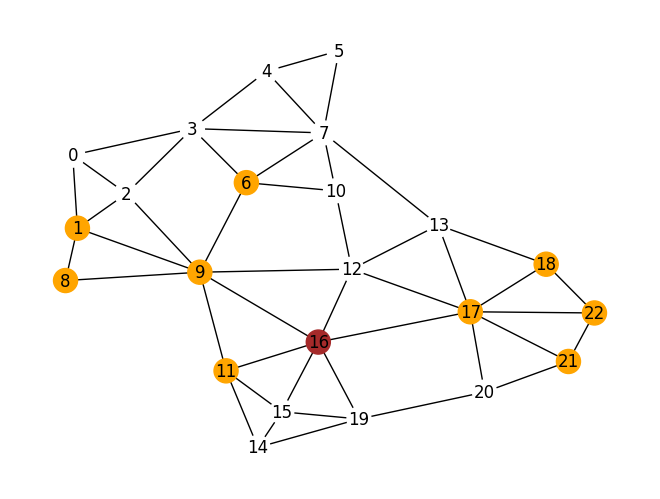

In [32]:
# TODO Find the nodes in the input layer that connect to the nodes in hidden layer 1
# using the adjacency matrix. Then sample n_sample of these nodes randomly without
# replacement. Exclude nodes already in hidden layer 1, hidden layer 2, or the output layer.
# The nodes at the input layer are the union of these nodes and the nodes in hidden layers 1 and 2.

hl12_idx = hl1_union_idx  # HL1 ∪ HL2

if hl12_idx.size > 0:
    in_cand = np.where((A[:, hl12_idx].sum(axis=1) > 0))[0]
else:
    in_cand = np.array([], dtype=int)

exclude2 = set([16]) | set(hl12_idx.tolist())
in_cand = np.array([i for i in in_cand if i not in exclude2], dtype=int)

k = min(n_sample, in_cand.size)
in_sample = np.random.choice(in_cand, size=k, replace=False) if k > 0 else np.array([], dtype=int)

input_union_idx = np.union1d(in_sample, hl12_idx)

input_layer_nodes = np.zeros((n_nodes, 1), dtype=int)
input_layer_nodes[input_union_idx, 0] = 1

draw_graph_structure(A, output_layer_nodes, input_layer_nodes)


If you did this correctly, there should be 9 yellow nodes in the figure.  The "receptive field" of node 16 in the output layer increases much more slowly as we move back through the layers of the network.